# 일별수익률 & 누적수익률

In [31]:
import FinanceDataReader as fdr
df = fdr.DataReader("035420", start = '2021')
df = df[['Close']]
df

,Close
Date,
2021-01-04,293000
2021-01-05,292500
2021-01-06,290000
2021-01-07,289500
2021-01-08,312000
...,...
2022-07-11,240500
2022-07-12,233500
2022-07-13,237500


In [34]:
def return_fn(df):
    return df['Close'].pct_change().fillna(0)

In [35]:
df_return = return_fn(df)
df_return

Date
2021-01-04    0.000000
2021-01-05   -0.001706
2021-01-06   -0.008547
2021-01-07   -0.001724
2021-01-08    0.077720
                ...   
2022-07-11   -0.034137
2022-07-12   -0.029106
2022-07-13    0.017131
2022-07-14   -0.016842
2022-07-15   -0.010707
Name: Close, Length: 380, dtype: float64

In [36]:
def cum_return_fn(df_return):
    return (1 + df_return).cumprod()

In [37]:
df_cum_return = cum_return_fn(df_return)
df_cum_return  - 1

Date
2021-01-04    0.000000
2021-01-05   -0.001706
2021-01-06   -0.010239
2021-01-07   -0.011945
2021-01-08    0.064846
                ...   
2022-07-11   -0.179181
2022-07-12   -0.203072
2022-07-13   -0.189420
2022-07-14   -0.203072
2022-07-15   -0.211604
Name: Close, Length: 380, dtype: float64

# Draw Down

In [38]:
import FinanceDataReader as fdr

df = fdr.DataReader("035420", start = '2021')
df = df[['Close']]
df

,Close
Date,
2021-01-04,293000
2021-01-05,292500
2021-01-06,290000
2021-01-07,289500
2021-01-08,312000
...,...
2022-07-11,240500
2022-07-12,233500
2022-07-13,237500


In [39]:
def return_fn(df):
    return df['Close'].pct_change().fillna(0)
def cum_return_fn(df_return):
    return (1 + df_return).cumprod()

In [40]:
df['Return'] = return_fn(df)
df['CumReturn'] = cum_return_fn(df['Return'])
df['MaxCumReturn'] = df['CumReturn'].cummax()
df['DrawDown'] = (df['CumReturn'] / df['MaxCumReturn']) -1
print(df['DrawDown'].min())

-0.49559471365638763


<AxesSubplot:xlabel='Date'>

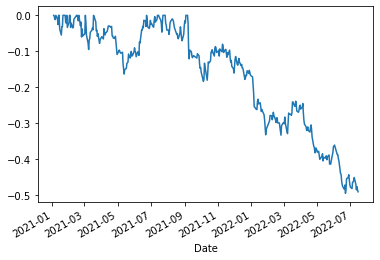

In [41]:
df['DrawDown'].plot()

# 종목정보

In [42]:
df

,Close,Return,CumReturn,MaxCumReturn,DrawDown
Date,,,,,
2021-01-04,293000,0.000000,1.000000,1.000000,0.000000
2021-01-05,292500,-0.001706,0.998294,1.000000,-0.001706
2021-01-06,290000,-0.008547,0.989761,1.000000,-0.010239
2021-01-07,289500,-0.001724,0.988055,1.000000,-0.011945
2021-01-08,312000,0.077720,1.064846,1.064846,0.000000
...,...,...,...,...,...
2022-07-11,240500,-0.034137,0.820819,1.549488,-0.470264
2022-07-12,233500,-0.029106,0.796928,1.549488,-0.485683
2022-07-13,237500,0.017131,0.810580,1.549488,-0.476872


In [43]:
mdd = df['DrawDown'].min()
mdd

-0.49559471365638763

In [44]:
#최저가
min_close_value = df['Close'].min()

# 최저가 날짜
min_date = df.index[df['Close'].argmin()]

# 최고가
max_close_value = df['Close'].max()

# mdd
round(mdd*100,2)
print(f"최고: {max_close_value}\n최저: {min_close_value}\nMDD: {round(mdd*100,2)}\n최저날짜: {min_date}")

최고: 454000
최저: 229000
MDD: -49.56
최저날짜: 2022-06-22 00:00:00


In [46]:
df_max_close = df[df['DrawDown'] == 0].copy()
df_max_close.loc[df.index[len(df)-1]] = 0
period = df_max_close.index[1:] - df_max_close.index[:-1]
mdd_days = period.days
max_period = mdd_days.max()
max_period_idx = mdd_days.argmax()
print(f"MAX Draw Down: {df_max_close.index[:-1][max_period_idx].date()} ~ {df_max_close.index[1:][max_period_idx].date()}")
print(f"{max_period} days")
print(f"max period : {max_period}")

MAX Draw Down: 2021-09-06 ~ 2022-07-15
312 days
max period : 312


# mdd_fn

In [47]:
def mdd_fn(df):
    df = df[['Close']].copy()
    def return_fn(df):
        return df['Close'].pct_change().fillna(0)
    def cum_return_fn(df_return):
        return (1 + df_return).cumprod()
    df['Return'] = return_fn(df)
    df['CumReturn'] = cum_return_fn(df['Return'])
    df['MaxCumReturn'] = df['CumReturn'].cummax()
    df['DrawDown'] = (df['CumReturn'] / df['MaxCumReturn']) -1
    mdd = df['DrawDown'].min()
    list_info = list()
    # 최저가
    min_close_value = df['Close'].min()
    # 최고가
    max_close_value = df['Close'].max()
    print("최고: {max_close_value}\n최저: {min_close_value}\nMDD: {round(mdd*100,2)}")
    df_max_close = df[df['DrawDown'] == 0].copy()
    df_max_close.loc[df.index[len(df)-1]] = 0
    period = df_max_close.index[1:] - df_max_close.index[:-1]
    mdd_days = period.days
    max_period = mdd_days.max()
    max_period_idx = mdd_days.argmax()
    print(f"MAX Draw Down: {df_max_close.index[:-1][max_period_idx].date()} ~ {df_max_close.index[1:][max_period_idx].date()}")
    print(f"{max_period} days")
    print(f"max period : {max_period}")
    
    list_info.append(max_close_value)
    list_info.append(min_close_value)
    list_info.append(round(mdd*100,2))
    list_info.append(df_max_close.index[:-1][max_period_idx].date())
    list_info.append(df_max_close.index[1:][max_period_idx].date())
    list_info.append(max_period)
          
    return df, list_info


In [48]:
import FinanceDataReader as fdr

df = fdr.DataReader("035420", start = '2021')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,291500,294000,285500,293000,947178,0.001709
2021-01-05,291500,292500,286500,292500,912657,-0.001706
2021-01-06,292500,300500,289500,290000,1375856,-0.008547
2021-01-07,288500,292000,286500,289500,1155734,-0.001724
2021-01-08,293500,312000,290000,312000,3175396,0.077720
...,...,...,...,...,...,...
2022-07-11,246000,248000,238500,240500,554603,-0.034137
2022-07-12,236500,237500,230500,233500,601679,-0.029106
2022-07-13,232000,239000,232000,237500,451619,0.017131


In [49]:
df_mdd, stock_info = mdd_fn(df)

최고: {max_close_value}
최저: {min_close_value}
MDD: {round(mdd*100,2)}
MAX Draw Down: 2021-09-06 ~ 2022-07-15
312 days
max period : 312


In [50]:
df_mdd

,Close,Return,CumReturn,MaxCumReturn,DrawDown
Date,,,,,
2021-01-04,293000,0.000000,1.000000,1.000000,0.000000
2021-01-05,292500,-0.001706,0.998294,1.000000,-0.001706
2021-01-06,290000,-0.008547,0.989761,1.000000,-0.010239
2021-01-07,289500,-0.001724,0.988055,1.000000,-0.011945
2021-01-08,312000,0.077720,1.064846,1.064846,0.000000
...,...,...,...,...,...
2022-07-11,240500,-0.034137,0.820819,1.549488,-0.470264
2022-07-12,233500,-0.029106,0.796928,1.549488,-0.485683
2022-07-13,237500,0.017131,0.810580,1.549488,-0.476872


In [51]:
stock_info

[454000,
 229000,
 -49.56,
 datetime.date(2021, 9, 6),
 datetime.date(2022, 7, 15),
 312]